# Anomaly detection


In [73]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']  
print(X.shape)


(307, 2)


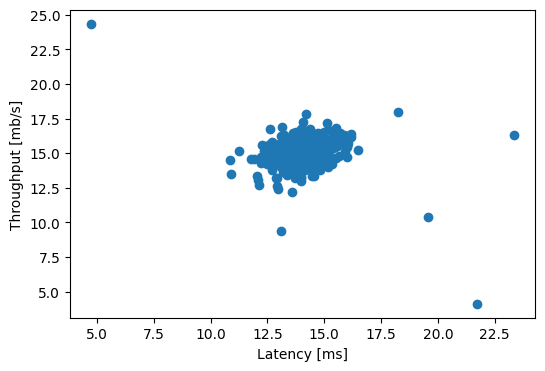

In [74]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Latency [ms]')
plt.ylabel('Throughput [mb/s]')
plt.show()

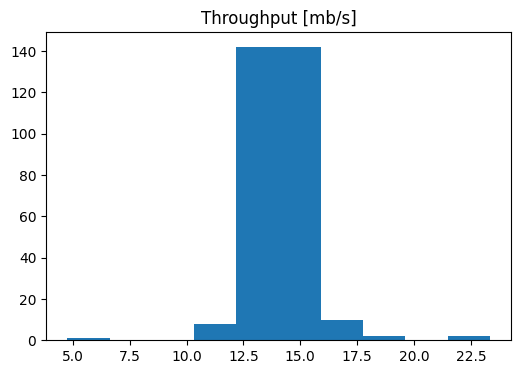

In [75]:
plt.figure(figsize=(6,4))
plt.hist(X[:,0])
plt.title('Throughput [mb/s]')
plt.show()

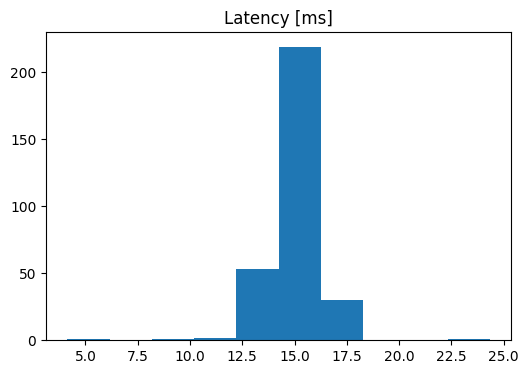

In [76]:
plt.figure(figsize=(6,4))
plt.hist(X[:,1])
plt.title('Latency [ms]')
plt.show()

In [77]:
def estimate_gaussian(X):  
    sigma, mu = np.zeros(X.shape[1]), np.zeros(X.shape[1])
    
    for i in range(X.shape[1]):
        sigma[i] = np.std(X[:,i])
        mu[i] = np.mean(X[:,i])
    return mu, sigma

In [78]:
print(estimate_gaussian(X))

(array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))


In [79]:
Xval = data['Xval']  
yval = data['yval']

print(f'Xval shape: {Xval.shape}')
print(f'yval shape: {yval.shape}')


Xval shape: (307, 2)
yval shape: (307, 1)


In [80]:
from scipy import stats

mu, sigma = estimate_gaussian(X)

pX = np.zeros((X.shape))
pX[:, 0] = stats.norm.pdf(X[:, 0], loc=mu[0], scale=sigma[0])
pX[:, 1] = stats.norm.pdf(X[:, 1], loc=mu[1], scale=sigma[1])

pval = np.zeros((Xval.shape))
pval[:,0] = stats.norm.pdf(Xval[:,0], loc=mu[0], scale=np.sqrt(sigma[0]))
pval[:,1] = stats.norm.pdf(Xval[:,1], loc=mu[1], scale=np.sqrt(sigma[1]))



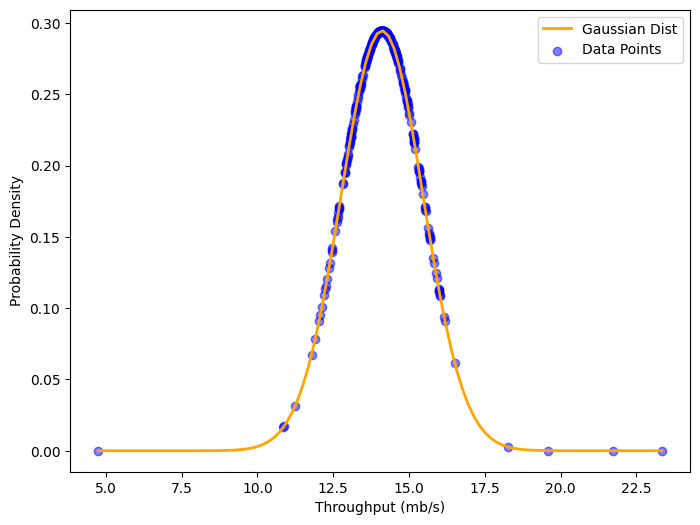

In [81]:
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
pdf_values = norm.pdf(x_values, loc=mu[0], scale=sigma[0])
data_pdf_values = norm.pdf(X[:, 0], loc=mu[0], scale=sigma[0])

plt.figure(figsize=(8, 6))
plt.plot(x_values, pdf_values, label='Gaussian Dist', color='orange', linewidth=2)
plt.scatter(X[:, 0], pX[:, 0], color='blue', label='Data Points', alpha=0.5)
plt.xlabel('Throughput (mb/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval):
    best_f1 = 0

    for thresh in list(np.linspace(pval.min(), pval.max(), 10000)):
        y = (pval[:, 0] <= thresh) | (pval[:, 1] <= thresh)
        f1s = f1_score(yval, y)
        if f1s > best_f1:
            best_f1 = f1s
            best_epsilon = thresh
    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval, yval)
print(f'Best epsilon value: {best_epsilon}\nBest f1 value: {best_f1}')

Best epsilon value: 6.978313623558666e-05
Best f1 value: 0.8750000000000001


In [83]:
y = ((pX[:,0] < best_epsilon) | (pX[:,1] < best_epsilon))
markers = [X[n] for n in np.where(y == 1)][0]



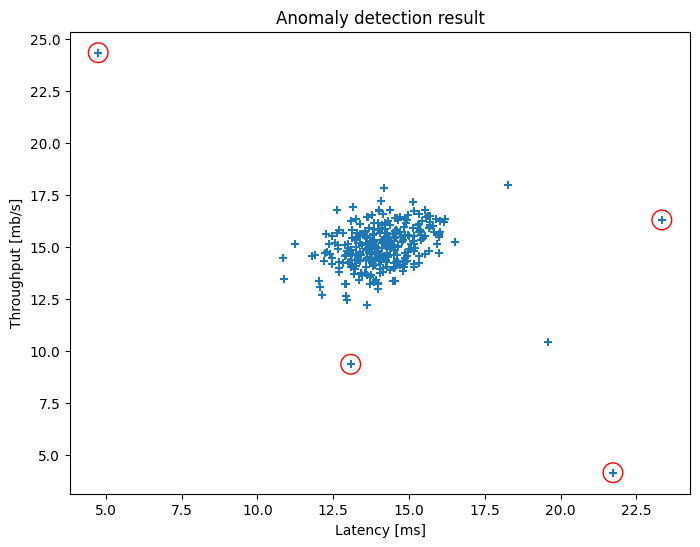

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1],marker='+')
plt.scatter(markers[:,0], markers[:,1], s=200, facecolors='none', edgecolors='r')

plt.title('Anomaly detection result')
plt.xlabel('Latency [ms]')
plt.ylabel('Throughput [mb/s]')
plt.show()